# Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Baca data CSV
df = pd.read_csv("scrapped_Tiktok_EN.csv")  # Ganti dengan path file aslimu


In [4]:
df = df.dropna(subset=["content"])  # Hapus baris dengan content kosong
reviews = df["content"].astype(str)  # Konversi ke string

In [5]:
df["at"] = pd.to_datetime(df["at"])  # Ubah ke format tanggal
df_filtered = df[df["at"].dt.year == 2024]

df_filtered.shape


(18996, 11)

In [6]:
df = df_filtered.sample(min(len(df_filtered), 6000), random_state=42)  # Ambil 6000 data 
df.score.value_counts()

score
1    2196
5    1892
3     672
4     633
2     607
Name: count, dtype: int64

In [7]:
def label_sentiment(score):
  if score <= 2:
    return 0
  else:
    return 1

df['sentimen'] = df['score'].apply(label_sentiment)

In [8]:
# akan mengembalikan data yang sudah di split
def Train_Test_Split(x, y, random_seed=None, test_size=0.2):
    n = len(x) # banyak data

    # jika punya seed
    if random_seed:
        np.random.seed(random_seed)
    
    # banyak data test
    test_size = int(test_size * n)

    # menentukan index secara random
    indices = np.random.permutation(n)
    train_indices, test_indices = indices[test_size:], indices[:test_size]

    return x.iloc[train_indices], x.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]
# menentukan x dan y nya
x = df["content"]
y = df["sentimen"]

# splitting pada data kita
X_train, X_test, y_train, y_test  = Train_Test_Split(x, y, random_seed=123)

# melihat isi data train
X_train

450                                    It's so fan to used
7501      I can't have a streak even if I'm always updated
16210    I like tiktok because,tiktok is helping me to ...
16485    this is a very useful app. i can watch everyth...
8925     Having fun watching videos in tiktok i like th...
                               ...                        
7668     This app is very cool you can post video and m...
2380     i cannot open my tiktok after the update, the ...
12164                                     It's a great app
5557     Please help! Whenever I close the app, it keep...
7007     I love tiktok, but I really use it all the tim...
Name: content, Length: 4800, dtype: object

In [23]:
import re
import string
from typing import List
from nltk.tokenize import word_tokenize

# preprocess_and_tokenize

def tokenize(text: str) -> List[str]:
    # 1. Bersihkan teks (menghapus mention, hashtag, URL, angka, RT, dan tanda baca)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention (@user)
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Hapus angka
    text = re.sub(r'RT[\s]+', '', text)  # Hapus "RT"
    text = re.sub(r'https?://\S+', '', text)  # Hapus URL
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca
    text = text.lower().strip()  # Konversi ke lowercase dan hapus spasi berlebih

    # 2. Tokenisasi menggunakan word_tokenize dari NLTK
    tokens = word_tokenize(text)

    return tokens  # Output dalam bentuk list kata


In [ ]:
X_train = df["content"].apply(tokenize)
df[["content", "tokens"]].head()  # Cek hasil tokenisasi

,content,tokens
2360,Why can't I put caption on my repost?!?!!,"[why, cant, i, put, caption, on, my, repost]"
9545,Sometimes I can't open it please fix it,"[sometimes, i, cant, open, it, please, fix, it]"
42,"I hate tiktok, When I want to create a new acc...","[i, hate, tiktok, when, i, want, to, create, a..."
3887,It has many bugs it's not worth it to install ...,"[it, has, many, bugs, its, not, worth, it, to,..."
3710,Earning coins while watching,"[earning, coins, while, watching]"


In [25]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df["tokens_no_stopwords"] = df["tokens"].apply(remove_stopwords)

print(df[["tokens", "tokens_no_stopwords"]].head())  # Cek hasilnya


                                                 tokens  \
2360       [why, cant, i, put, caption, on, my, repost]   
9545    [sometimes, i, cant, open, it, please, fix, it]   
42    [i, hate, tiktok, when, i, want, to, create, a...   
3887  [it, has, many, bugs, its, not, worth, it, to,...   
3710                  [earning, coins, while, watching]   

                                    tokens_no_stopwords  
2360                       [cant, put, caption, repost]  
9545               [sometimes, cant, open, please, fix]  
42    [hate, tiktok, want, create, new, account, ran...  
3887    [many, bugs, worth, install, hope, tiktok, fix]  
3710                         [earning, coins, watching]  


In [26]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()

def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

df["tokens_stemmed"] = df["tokens_no_stopwords"].apply(stemming)

# print(df[["tokens_no_stopwords", "tokens_stemmed"]].head())  # Cek hasilnya
# df[["tokens_no_stopwords", "tokens_stemmed"]].head()


In [27]:
# import nltk
# nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["tokens_lemmatized"] = df["tokens_no_stopwords"].apply(lemmatization)

# print(df[["tokens_no_stopwords", "tokens_lemmatized"]].head())  # Cek hasilnya


In [28]:
df[["tokens_no_stopwords", "tokens_stemmed", "tokens_lemmatized"]].head()

,tokens_no_stopwords,tokens_stemmed,tokens_lemmatized
2360,"[cant, put, caption, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]"
9545,"[sometimes, cant, open, please, fix]","[sometim, cant, open, pleas, fix]","[sometimes, cant, open, please, fix]"
42,"[hate, tiktok, want, create, new, account, ran...","[hate, tiktok, want, creat, new, account, rand...","[hate, tiktok, want, create, new, account, ran..."
3887,"[many, bugs, worth, install, hope, tiktok, fix]","[mani, bug, worth, instal, hope, tiktok, fix]","[many, bug, worth, install, hope, tiktok, fix]"
3710,"[earning, coins, watching]","[earn, coin, watch]","[earning, coin, watching]"


In [30]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

sentimen
1    3197
0    2803
Name: count, dtype: int64

In [31]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,tokens,tokens_no_stopwords,tokens_stemmed,tokens_lemmatized,sentimen
2360,aed8e7d9-f07c-4eb4-aaad-623e8749eaa3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Why can't I put caption on my repost?!?!!,1,0,37.0.4,2024-10-26 09:03:07,NaN,NaN,37.0.4,"[why, cant, i, put, caption, on, my, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]",0
9545,a6ef5e66-de49-4a93-b98a-c66bc686bc9d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Sometimes I can't open it please fix it,4,0,28.5.4,2024-08-18 16:02:28,NaN,NaN,28.5.4,"[sometimes, i, cant, open, it, please, fix, it]","[sometimes, cant, open, please, fix]","[sometim, cant, open, pleas, fix]","[sometimes, cant, open, please, fix]",1
42,2d33acbf-a885-441a-8a12-3d649a84c217,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I hate tiktok, When I want to create a new acc...",1,25,37.2.6,2024-11-19 11:52:07,NaN,NaN,37.2.6,"[i, hate, tiktok, when, i, want, to, create, a...","[hate, tiktok, want, create, new, account, ran...","[hate, tiktok, want, creat, new, account, rand...","[hate, tiktok, want, create, new, account, ran...",0
3887,9167075e-8c4c-46c9-825d-3035bfea9117,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It has many bugs it's not worth it to install ...,1,0,NaN,2024-10-10 11:27:00,NaN,NaN,NaN,"[it, has, many, bugs, its, not, worth, it, to,...","[many, bugs, worth, install, hope, tiktok, fix]","[mani, bug, worth, instal, hope, tiktok, fix]","[many, bug, worth, install, hope, tiktok, fix]",0
3710,762ea22c-531a-470b-be7f-91b218adfca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Earning coins while watching,5,0,36.7.4,2024-10-12 09:57:52,NaN,NaN,36.7.4,"[earning, coins, while, watching]","[earning, coins, watching]","[earn, coin, watch]","[earning, coin, watching]",1


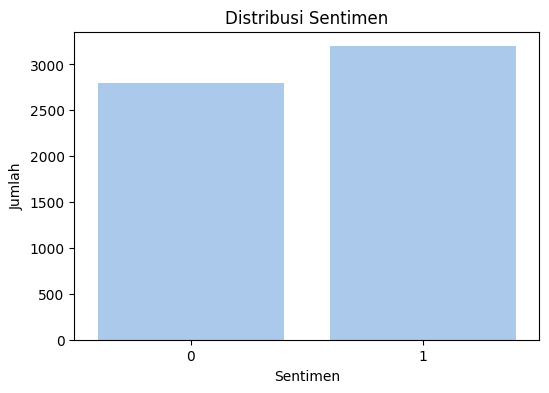

In [32]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentimen')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [33]:
# data_negatif = df[df['sentimen'] == "Negatif"]
# data_positif = df[df['sentimen'] == "Positif"]
data_negatif = df[df['sentimen'] == 0]
data_positif = df[df['sentimen'] == 1]

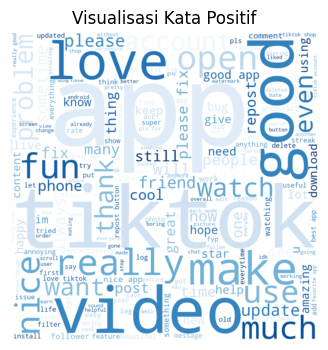

In [34]:
from wordcloud import WordCloud

all_text_s1 = ' '.join(word for word in data_positif['content'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, background_color='white', mode="RGBA").generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.show()


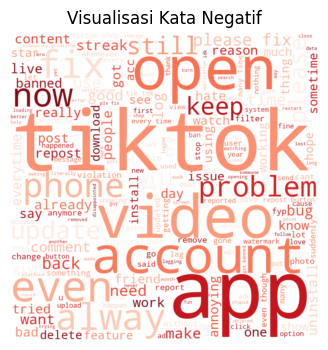

In [35]:
all_text_s0 = ' '.join(word for word in data_negatif['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, background_color='white', mode="RGBA").generate(all_text_s0)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.show()


In [36]:
total_corpus = set(word for tokens in df["tokens_lemmatized"] for word in tokens)

word_count_list = []
for tokens in df["tokens_lemmatized"]:
    word_count = dict.fromkeys(total_corpus, 0)
    for word in tokens:
        word_count[word] += 1
    word_count_list.append(word_count)


In [37]:
# word_counts = []

# # Iterasi setiap review dalam dataset
# for tokens in df["tokens"]:
#     word_count = dict.fromkeys(total_corpus, 0)  # Inisialisasi semua kata dengan 0
#     for word in tokens:
#         word_count[word] += 1  # Hitung kemunculan kata dalam review
#     word_counts.append(word_count)

# # Konversi ke DataFrame
# freq_df = pd.DataFrame(word_counts)

# # Menampilkan semua baris (opsional, bisa menyebabkan output panjang)
# pd.set_option("display.max_rows", None)

# # Tampilkan DataFrame Transpose agar lebih mudah dibaca
# freq_df.T.head(5)


In [111]:
import tkinter as tk
from tkinter import messagebox

def predict_sentiment():
    text = entry.get()
    if not text:
        messagebox.showwarning("Input Error", "Masukkan teks terlebih dahulu!")
        return
    
    # Preprocessing
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatization(tokens)

    # TF-IDF Vectorization
    tf_vector = {word: tokens.count(word) / len(tokens) for word in set(tokens)}
    tfidf_vector = {word: tf_vector.get(word, 0) * idf_values.get(word, 0) for word in total_corpus}

    # x_input = np.array([tfidf_vector.get(word, 0) for word in total_corpus]).reshape(1, -1)  # Pastikan bentuknya 2D
    x_input = np.array([tfidf_vector.get(word, 0) for word in total_corpus])
    if x_input.shape[0] != len(total_corpus):
        x_input = np.pad(x_input, (0, len(total_corpus) - x_input.shape[0]))
    x_input = x_input.reshape(1, -1)


    # Prediksi model
    pred = model.predict(x_input)[0]
    result = "POSITIF" if pred == 1 else "NEGATIF"
    
    result_label.config(text=f"Prediksi Sentimen: {result}")


In [ ]:
# def predict_sentiment():
#     text = entry.get()
#     if not text:
#         messagebox.showwarning("Input Error", "Masukkan teks terlebih dahulu!")
#         return

#     # Ubah input teks ke format TF-IDF
#     x_input = vectorizer.transform([text])

#     # Prediksi sentimen
#     pred = model.predict(x_input)[0]
#     result = "POSITIF 😊" if pred == 1 else "NEGATIF 😞"

#     # Tampilkan hasil
#     result_label.config(text=f"Prediksi Sentimen: {result}")


In [112]:
# **Buat UI dengan Tkinter**
root = tk.Tk()
root.title("Klasifikasi Sentimen - KNN")

tk.Label(root, text="Masukkan Teks:", font=("Arial", 12)).pack(pady=5)
entry = tk.Entry(root, width=50, font=("Arial", 12))
entry.pack(pady=5)

tk.Button(root, text="Prediksi Sentimen", command=predict_sentiment, font=("Arial", 12)).pack(pady=10)
result_label = tk.Label(root, text="Hasil: ", font=("Arial", 14, "bold"))
result_label.pack(pady=10)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\dirga\miniconda3\envs\python3.11\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\dirga\AppData\Local\Temp\ipykernel_4652\3419247037.py", line 27, in predict_sentiment
    pred = model.predict(x_input)[0]
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dirga\AppData\Local\Temp\ipykernel_4652\1535476756.py", line 20, in predict
    predictions = [self._predict(x) for x in X_test]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dirga\AppData\Local\Temp\ipykernel_4652\1535476756.py", line 20, in <listcomp>
    predictions = [self._predict(x) for x in X_test]
                   ^^^^^^^^^^^^^^^^
  File "C:\Users\dirga\AppData\Local\Temp\ipykernel_4652\1535476756.py", line 28, in _predict
    distances = np.linalg.norm(self.X_train - x, axis=1)
                               ~~~~~~~~~~~~~^~~
ValueError: operands co

In [59]:
print(model.label_map)


None


In [60]:
unique, counts = np.unique(y_train, return_counts=True)
print("Distribusi Data Train:", dict(zip(unique, counts)))


Distribusi Data Train: {0: 2255, 1: 2545}
